In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
# Load the dataset
df = pd.read_csv('Project/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
df.shape

(2000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


<Axes: >

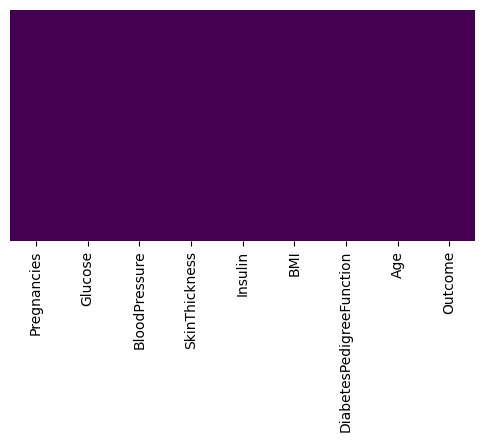

In [8]:
plt.figure(figsize=(6, 3))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995     True
1996     True
1997     True
1998     True
1999     True
Length: 2000, dtype: bool

In [11]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [12]:
# Basic information
print("\n📋 Dataset Info:")
df.info()


📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [13]:
# ## 2. Exploratory Data Analysis (EDA)

# %%
print("🎯 Target Variable Distribution:")
print(df['Outcome'].value_counts())
print(f"\nDiabetes Prevalence: {(df['Outcome'].mean() * 100):.2f}%")


🎯 Target Variable Distribution:
Outcome
0    1316
1     684
Name: count, dtype: int64

Diabetes Prevalence: 34.20%


C:\Users\HP\AppData\Local\Temp\ipykernel_19416\1430152604.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


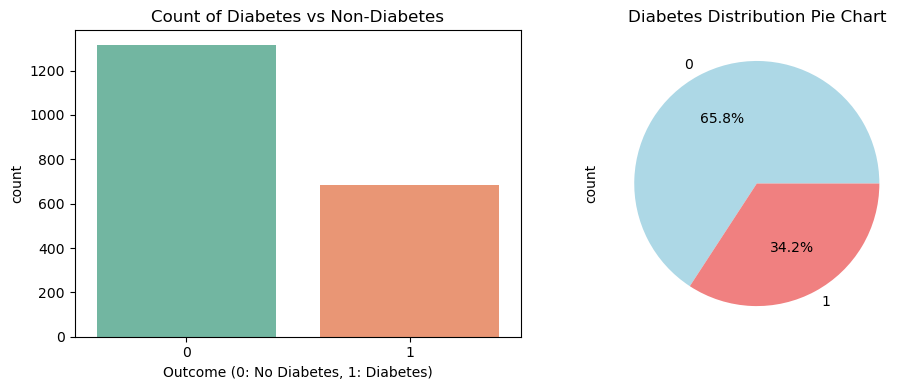

In [14]:
# Target distribution visualization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Count of Diabetes vs Non-Diabetes')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')

plt.subplot(1, 2, 2)
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Diabetes Distribution Pie Chart')

plt.tight_layout()
plt.show()

📈 Univariate Analysis - Numerical Features Distribution


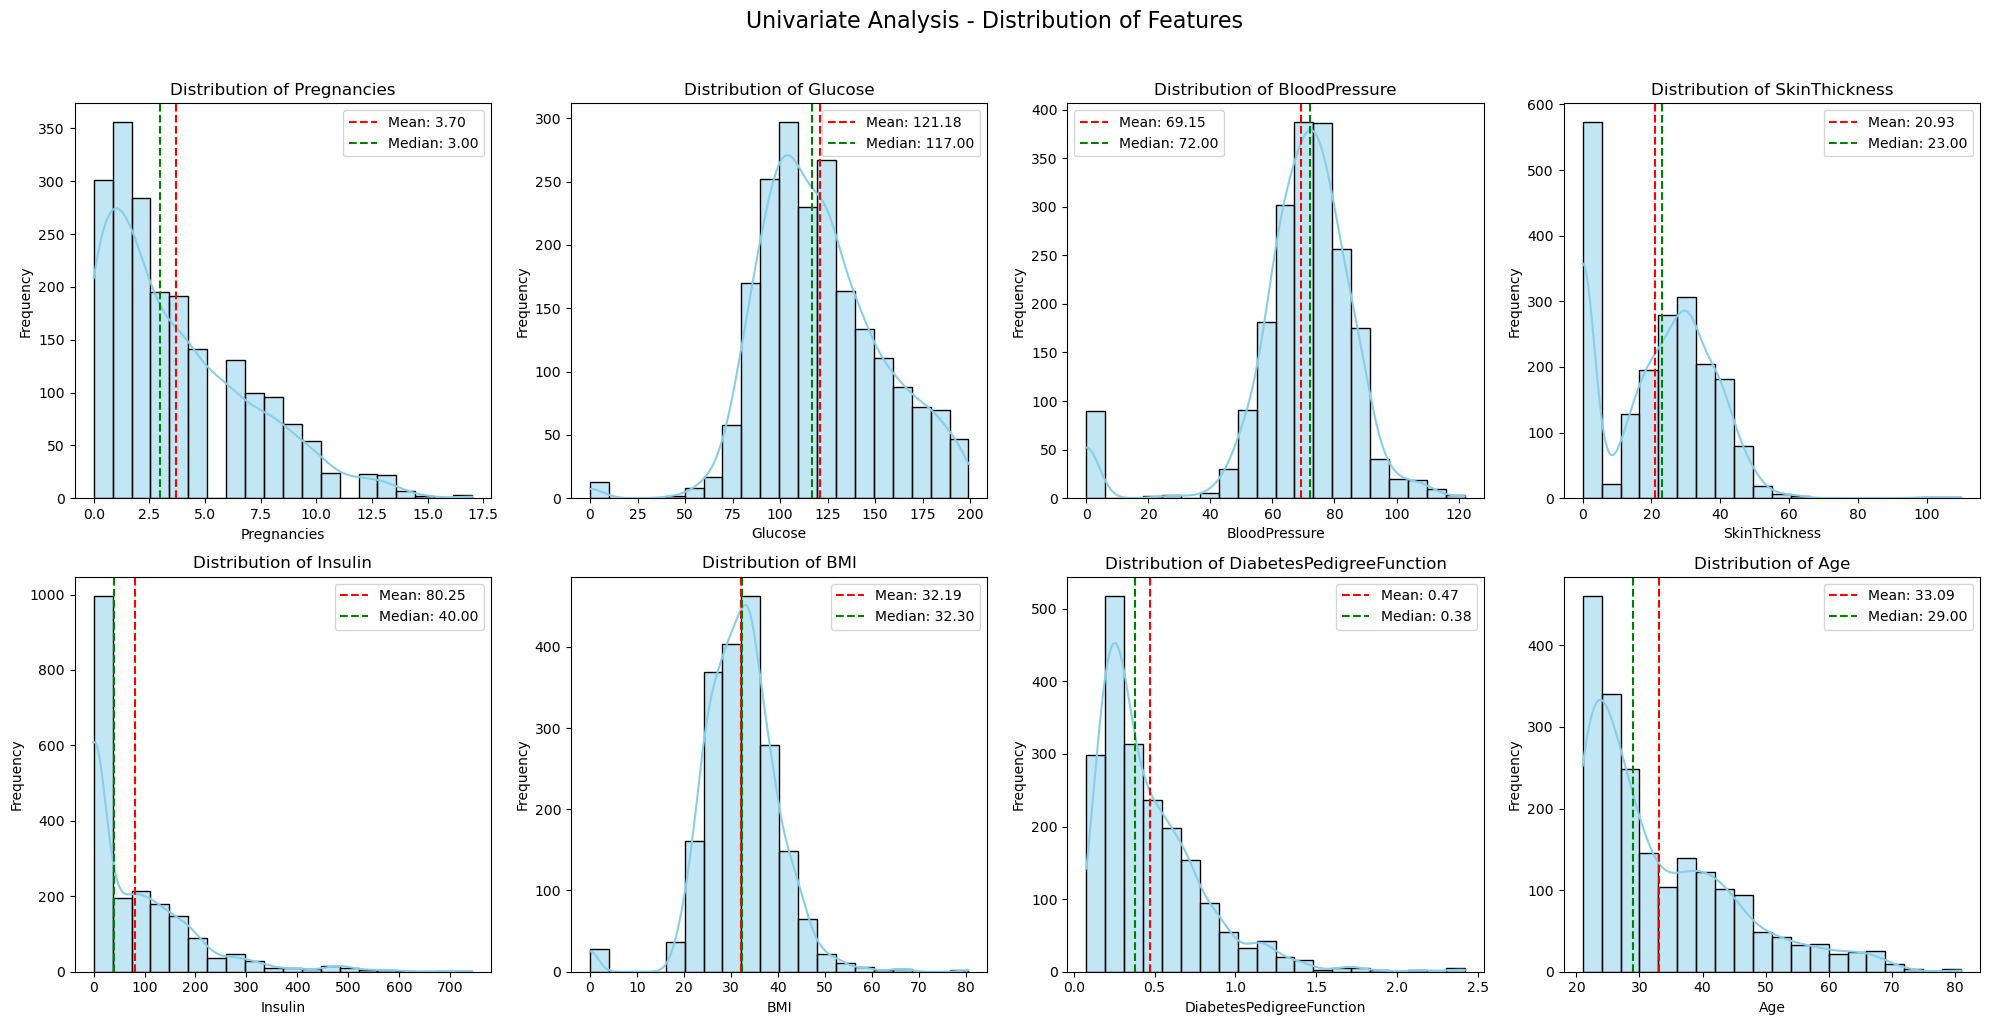

In [15]:
# ### 2.1 Univariate Analysis

# %%
print("📈 Univariate Analysis - Numerical Features Distribution")

# Select numerical features
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create subplots for univariate analysis
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Univariate Analysis - Distribution of Features', fontsize=16, y=1.02)

for i, feature in enumerate(numerical_features):
    row, col = i // 4, i % 4
    # Histogram with KDE
    sns.histplot(df[feature], kde=True, ax=axes[row, col], color='skyblue', bins=20)
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    
    # Add statistics
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[row, col].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[row, col].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

In [16]:
# Statistical summary
print("\n📊 Statistical Summary of Features:")
display(df[numerical_features].describe())


📊 Statistical Summary of Features:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000


🔗 Bivariate Analysis - Features vs Outcome


C:\Users\HP\AppData\Local\Temp\ipykernel_19416\3679005476.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, ax=axes[row, col], palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_19416\3679005476.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, ax=axes[row, col], palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_19416\3679005476.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, ax=axes[row, col], palette='Set2')
C:\Users\H

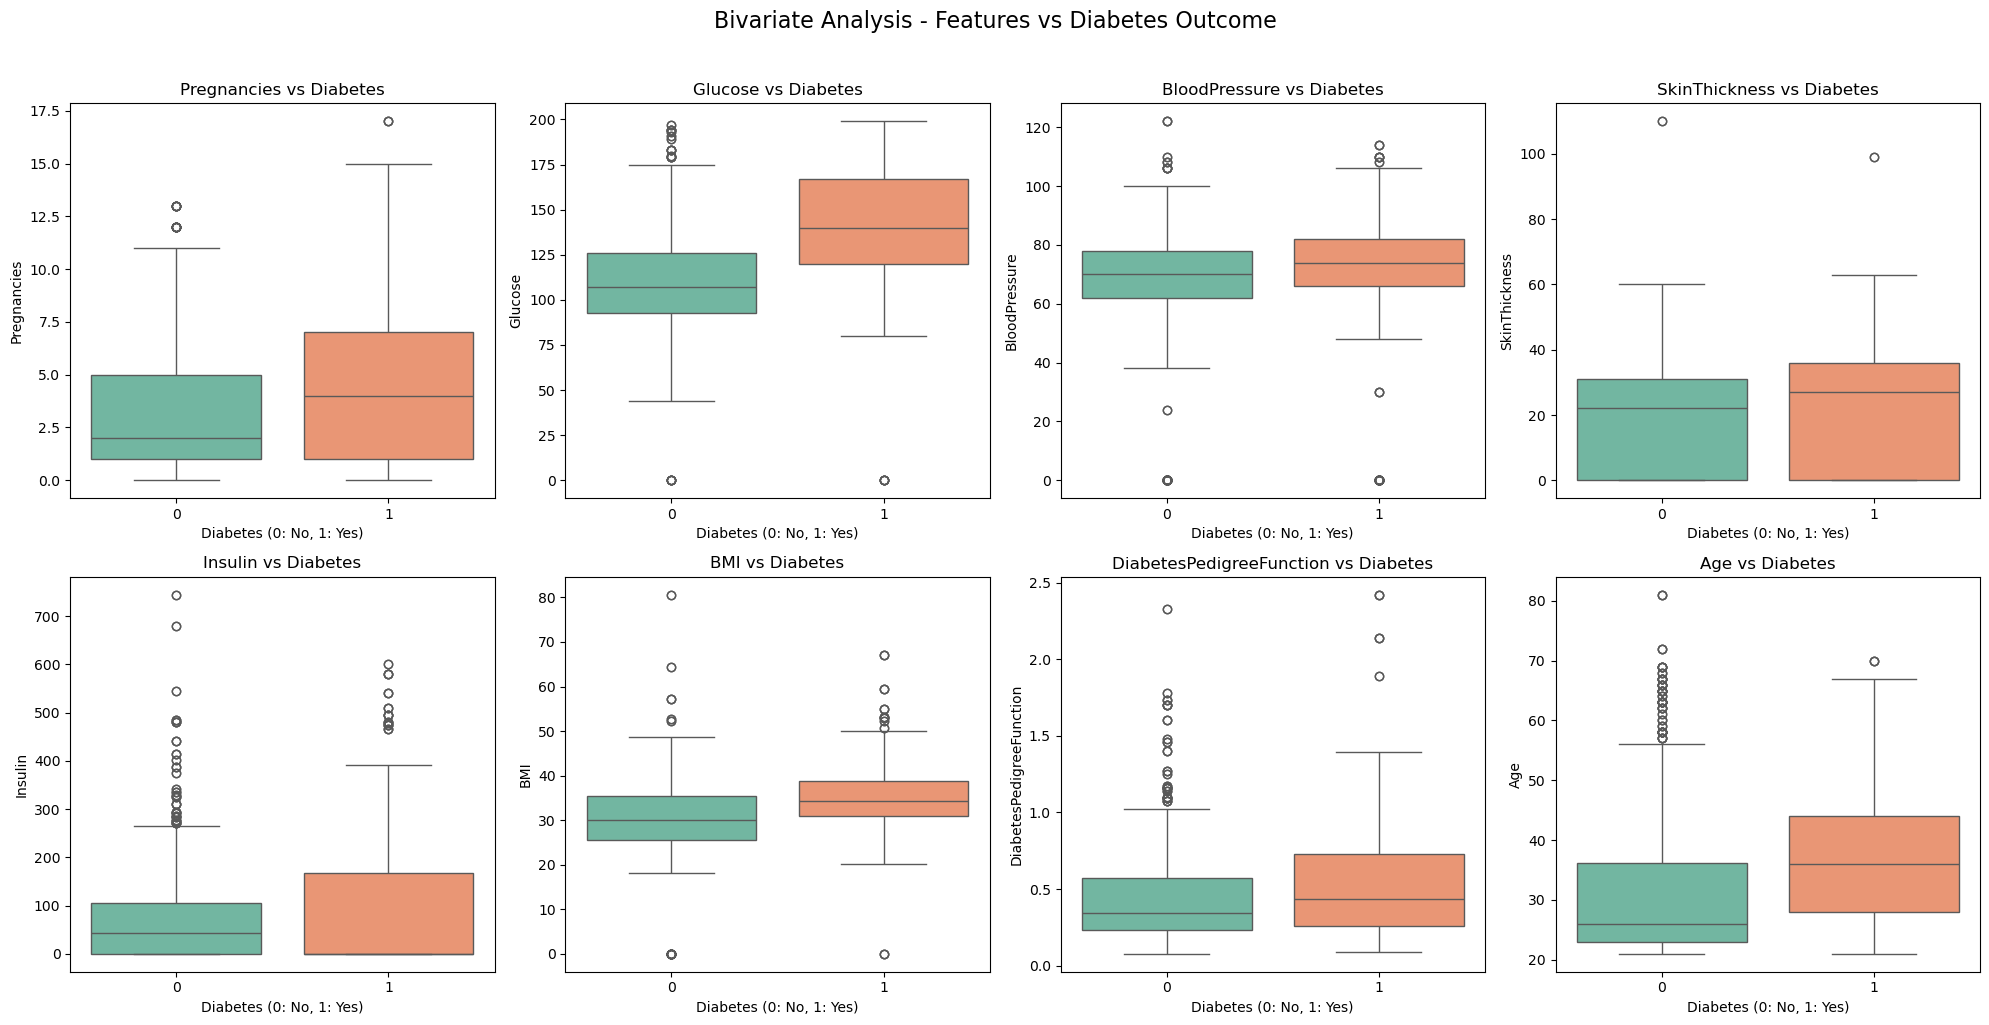

In [17]:
# ### 2.2 Bivariate Analysis

# %%
print("🔗 Bivariate Analysis - Features vs Outcome")

# Create subplots for bivariate analysis
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Bivariate Analysis - Features vs Diabetes Outcome', fontsize=16, y=1.02)

for i, feature in enumerate(numerical_features):
    row, col = i // 4, i % 4
    # Box plot
    sns.boxplot(x='Outcome', y=feature, data=df, ax=axes[row, col], palette='Set2')
    axes[row, col].set_title(f'{feature} vs Diabetes')
    axes[row, col].set_xlabel('Diabetes (0: No, 1: Yes)')
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19416\1992473153.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=feature, data=df, ax=axes[row, col], palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_19416\1992473153.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=feature, data=df, ax=axes[row, col], palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_19416\1992473153.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=feature, data=df, ax=axes[row, col], palette='pastel'

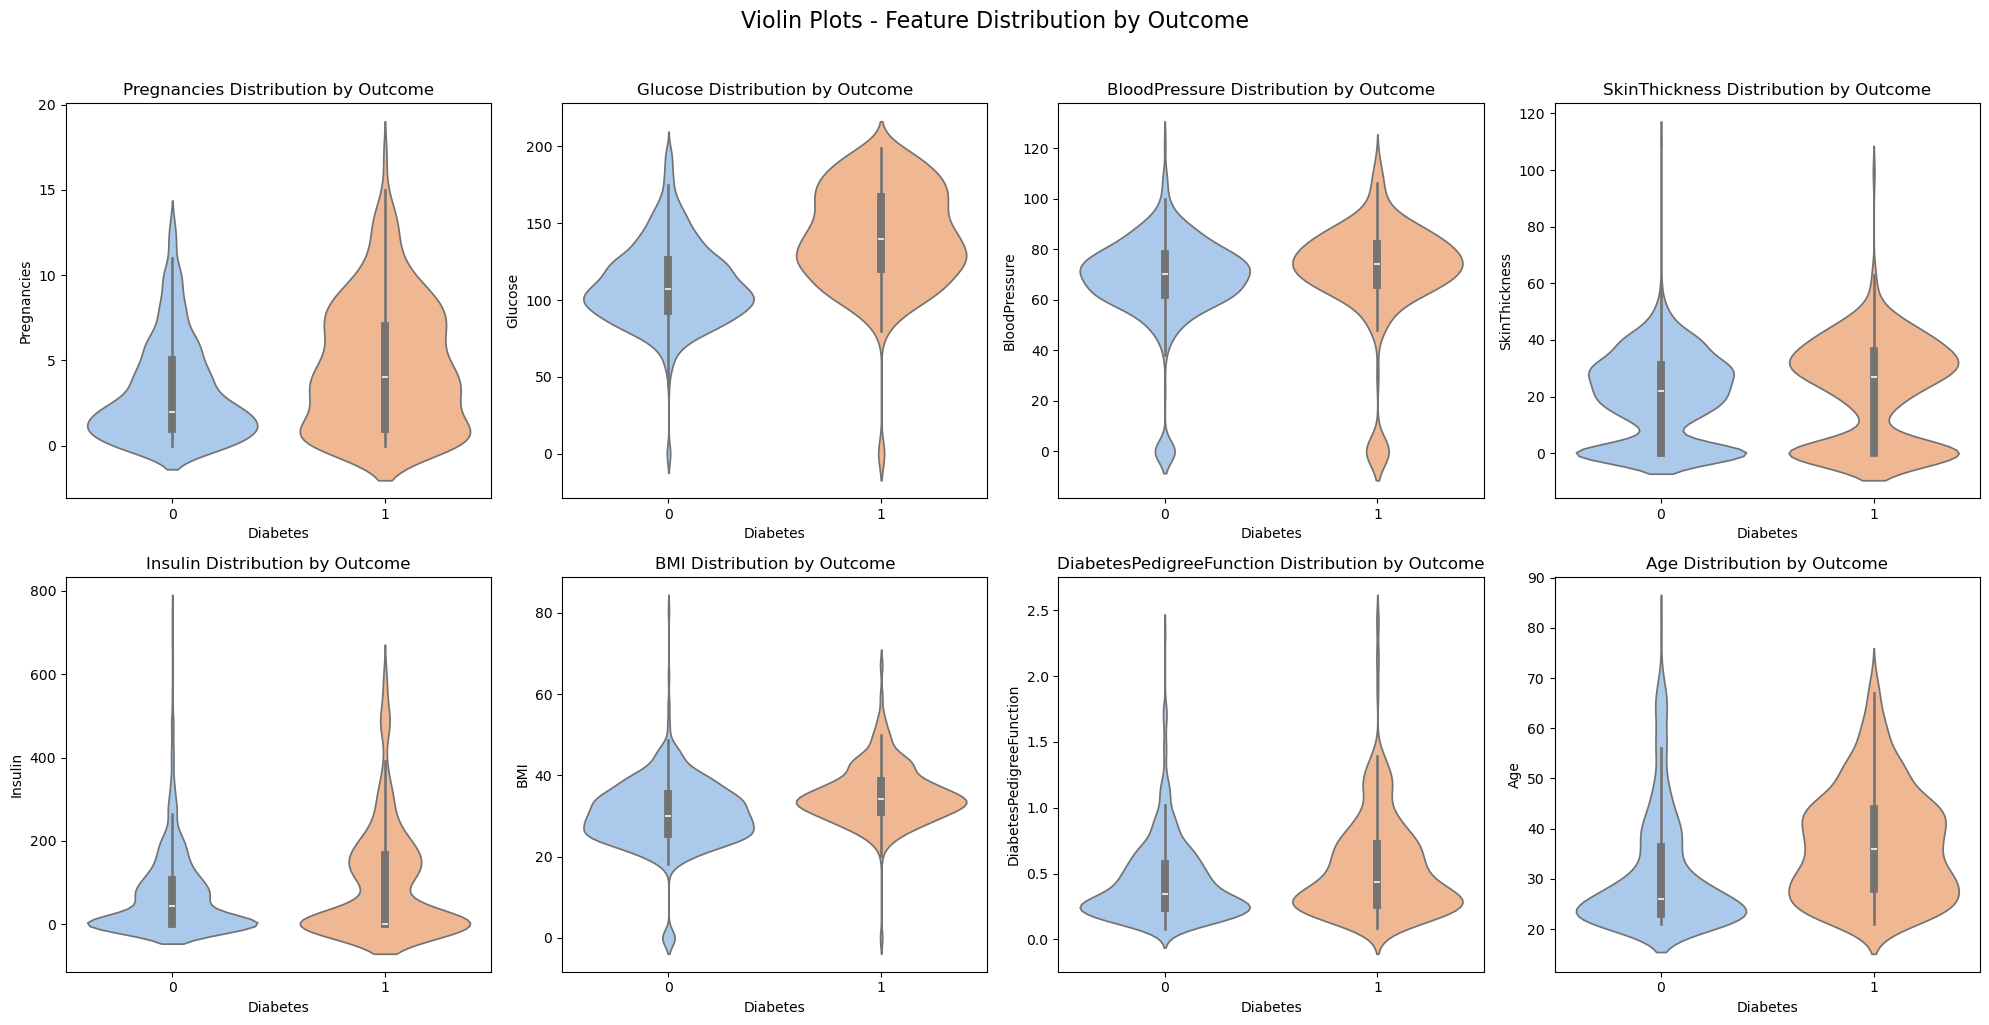

In [18]:
# Violin plots for better distribution view
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Violin Plots - Feature Distribution by Outcome', fontsize=16, y=1.02)

for i, feature in enumerate(numerical_features):
    row, col = i // 4, i % 4
    sns.violinplot(x='Outcome', y=feature, data=df, ax=axes[row, col], palette='pastel')
    axes[row, col].set_title(f'{feature} Distribution by Outcome')
    axes[row, col].set_xlabel('Diabetes')

plt.tight_layout()
plt.show()

🌐 Multivariate Analysis - Correlation Heatmap


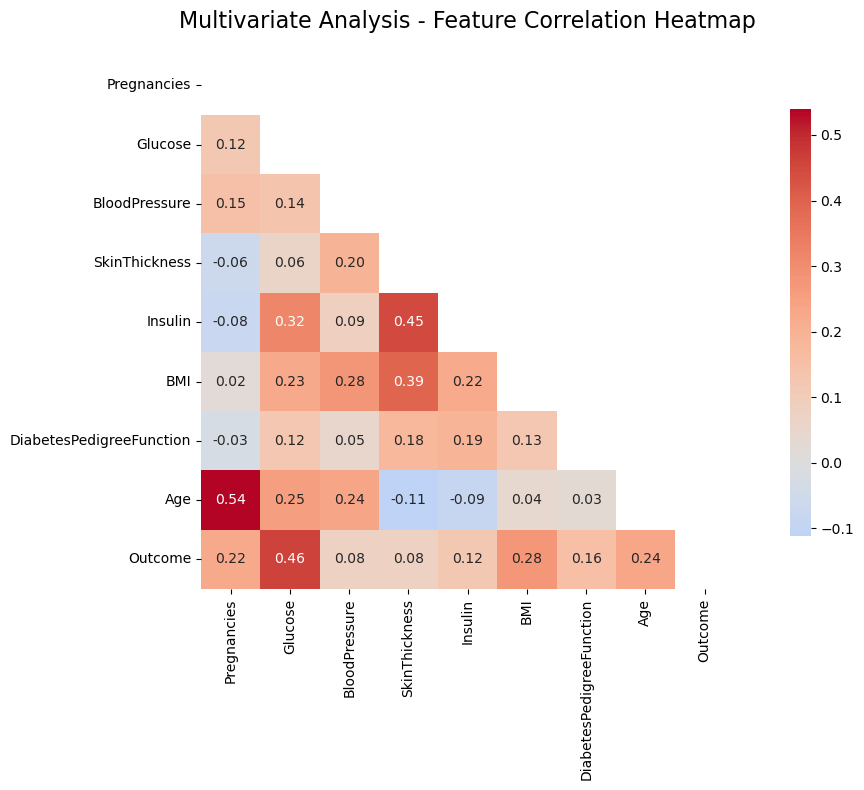

In [19]:
# ### 2.3 Multivariate Analysis

# %%
print("🌐 Multivariate Analysis - Correlation Heatmap")

# Calculate correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('Multivariate Analysis - Feature Correlation Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.show()



📊 Pairplot for Key Features (Glucose, BMI, Age, Outcome)


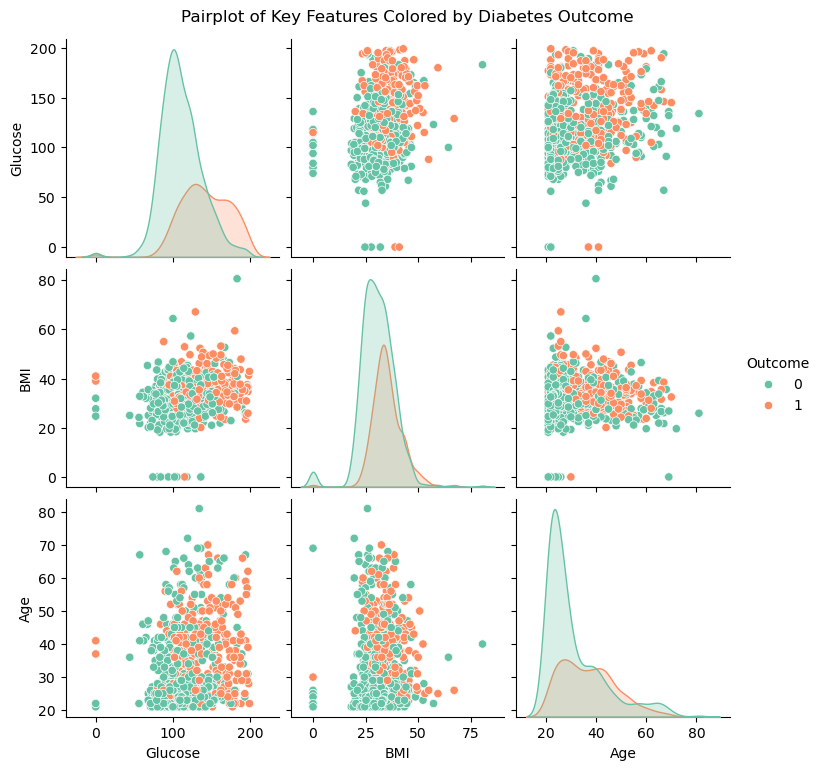

In [20]:
# Pairplot for selected features (smaller subset for clarity)
print("\n📊 Pairplot for Key Features (Glucose, BMI, Age, Outcome)")
selected_features = ['Glucose', 'BMI', 'Age', 'Outcome']
sns.pairplot(df[selected_features], hue='Outcome', palette='Set2', diag_kind='kde')
plt.suptitle('Pairplot of Key Features Colored by Diabetes Outcome', y=1.02)
plt.show()

In [21]:
# ### 2.4 EDA Conclusions

# %%
print("🎯 EDA CONCLUSIONS AND INSIGHTS:")
print("=" * 50)

# Key insights from EDA
print("""
1. **DATA QUALITY ISSUES:**
   - Several features (Glucose, BloodPressure, SkinThickness, Insulin, BMI) have zero values that are biologically impossible
   - These likely represent missing data that needs to be handled

2. **TARGET DISTRIBUTION:**
   - Dataset is somewhat balanced with 65.1% non-diabetic and 34.9% diabetic cases
   - No severe class imbalance issues

3. **FEATURE DISTRIBUTIONS:**
   - Glucose levels show clear separation between diabetic and non-diabetic groups
   - BMI distribution differs significantly between the two groups
   - Age appears to be a factor, with diabetic patients generally older

4. **CORRELATION INSIGHTS:**
   - Glucose has the highest correlation with Outcome (0.47)
   - BMI and Age also show moderate correlation with Outcome
   - Some features show multicollinearity (e.g., Age and Pregnancies)

5. **OUTLIERS:**
   - Several features show presence of outliers, especially in Insulin and DiabetesPedigreeFunction
""")


🎯 EDA CONCLUSIONS AND INSIGHTS:

1. **DATA QUALITY ISSUES:**
   - Several features (Glucose, BloodPressure, SkinThickness, Insulin, BMI) have zero values that are biologically impossible
   - These likely represent missing data that needs to be handled

2. **TARGET DISTRIBUTION:**
   - Dataset is somewhat balanced with 65.1% non-diabetic and 34.9% diabetic cases
   - No severe class imbalance issues

3. **FEATURE DISTRIBUTIONS:**
   - Glucose levels show clear separation between diabetic and non-diabetic groups
   - BMI distribution differs significantly between the two groups
   - Age appears to be a factor, with diabetic patients generally older

4. **CORRELATION INSIGHTS:**
   - Glucose has the highest correlation with Outcome (0.47)
   - BMI and Age also show moderate correlation with Outcome
   - Some features show multicollinearity (e.g., Age and Pregnancies)

5. **OUTLIERS:**
   - Several features show presence of outliers, especially in Insulin and DiabetesPedigreeFunction



In [22]:
# Check for zero values in medical features
medical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\n🔍 Zero Values in Medical Features (Potential Missing Data):")
for feature in medical_features:
    zero_count = (df[feature] == 0).sum()
    percentage = (zero_count / len(df)) * 100
    print(f"   {feature}: {zero_count} zeros ({percentage:.1f}%)")


🔍 Zero Values in Medical Features (Potential Missing Data):
   Glucose: 13 zeros (0.7%)
   BloodPressure: 90 zeros (4.5%)
   SkinThickness: 573 zeros (28.6%)
   Insulin: 956 zeros (47.8%)
   BMI: 28 zeros (1.4%)


In [23]:
# ## 3. Data Pre-processing

# %%
print("🧹 DATA PRE-PROCESSING")
print("=" * 40)

# Create a copy of the original data
df_clean = df.copy()
print("✅ Created clean copy of dataset")

# Handle zero values in medical features
print("\n🔄 Handling zero values in medical features...")
for feature in medical_features:
    # Calculate median excluding zeros
    median_val = df_clean[df_clean[feature] != 0][feature].median()
    zero_count_before = (df_clean[feature] == 0).sum()
    
    # Replace zeros with median
    df_clean[feature] = df_clean[feature].replace(0, median_val)
    zero_count_after = (df_clean[feature] == 0).sum()
    
    print(f"   {feature}: Replaced {zero_count_before} zeros with median {median_val:.2f}")

# Verify no more zeros in medical features
print(f"\n✅ Zero values after cleaning: {(df_clean[medical_features] == 0).sum().sum()}")

# Check for any missing values
print(f"🔍 Missing values after cleaning: {df_clean.isnull().sum().sum()}")


🧹 DATA PRE-PROCESSING
✅ Created clean copy of dataset

🔄 Handling zero values in medical features...
   Glucose: Replaced 13 zeros with median 117.00
   BloodPressure: Replaced 90 zeros with median 72.00
   SkinThickness: Replaced 573 zeros with median 29.00
   Insulin: Replaced 956 zeros with median 126.00
   BMI: Replaced 28 zeros with median 32.40

✅ Zero values after cleaning: 0
🔍 Missing values after cleaning: 0


In [24]:
# Display dataset info after cleaning
print("\n📊 Dataset after cleaning:")
print(f"Shape: {df_clean.shape}")
display(df_clean.describe())


📊 Dataset after cleaning:
Shape: (2000, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.943000,72.385500,29.243500,140.48200,32.646600,0.470930,33.090500,0.342000
std,3.306063,30.535733,11.949824,9.124957,81.56284,7.190196,0.323553,11.786423,0.474498
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,120.00000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,126.00000,32.400000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.00000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.00000,80.600000,2.420000,81.000000,1.000000


In [25]:
# ## 4. Feature Selection and Engineering

# %%
print("🔧 FEATURE SELECTION AND ENGINEERING")
print("=" * 45)

# Calculate correlation with target
correlation_with_target = df_clean.corr()['Outcome'].sort_values(ascending=False)
print("📈 Feature Correlation with Diabetes Outcome:")
for feature, corr in correlation_with_target.items():
    if feature != 'Outcome':
        print(f"   {feature}: {corr:.3f}")

# Select features based on correlation threshold
feature_correlation = correlation_with_target.drop('Outcome')
selected_features = feature_correlation[abs(feature_correlation) > 0.1].index.tolist()

print(f"\n✅ Selected features (|correlation| > 0.1): {selected_features}")


🔧 FEATURE SELECTION AND ENGINEERING
📈 Feature Correlation with Diabetes Outcome:
   Glucose: 0.488
   BMI: 0.282
   Age: 0.237
   Pregnancies: 0.224
   SkinThickness: 0.205
   Insulin: 0.197
   BloodPressure: 0.174
   DiabetesPedigreeFunction: 0.155

✅ Selected features (|correlation| > 0.1): ['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin', 'BloodPressure', 'DiabetesPedigreeFunction']


In [26]:
# Feature Engineering: Create new features
print("\n🆕 Feature Engineering:")

# Create BMI categories
df_clean['BMI_Category'] = pd.cut(df_clean['BMI'], 
                                 bins=[0, 18.5, 25, 30, 100], 
                                 labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Create Age groups
df_clean['Age_Group'] = pd.cut(df_clean['Age'], 
                              bins=[0, 30, 45, 60, 100], 
                              labels=['Young', 'Middle', 'Senior', 'Elderly'])

# Create Glucose level categories
df_clean['Glucose_Level'] = pd.cut(df_clean['Glucose'], 
                                  bins=[0, 100, 126, 300], 
                                  labels=['Normal', 'Prediabetic', 'Diabetic'])

print("✅ Created new features: BMI_Category, Age_Group, Glucose_Level")



🆕 Feature Engineering:
✅ Created new features: BMI_Category, Age_Group, Glucose_Level


In [27]:
print("\n📋 New feature distributions:")
print("BMI Categories:")
print(df_clean['BMI_Category'].value_counts())
print("\nAge Groups:")
print(df_clean['Age_Group'].value_counts())


📋 New feature distributions:
BMI Categories:
BMI_Category
Obese          1244
Overweight      478
Normal          268
Underweight      10
Name: count, dtype: int64

Age Groups:
Age_Group
Young      1106
Middle      598
Senior      217
Elderly      79
Name: count, dtype: int64


In [28]:
# Prepare final feature set
X = df_clean[selected_features]  # Using selected numerical features
y = df_clean['Outcome']

print(f"\n🎯 Final feature set shape: {X.shape}")
print(f"Features: {list(X.columns)}")


🎯 Final feature set shape: (2000, 8)
Features: ['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin', 'BloodPressure', 'DiabetesPedigreeFunction']


In [29]:
# ## 5. Train-Test Split

# %%
print("📊 TRAIN-TEST SPLIT")
print("=" * 30)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,      # For reproducibility
    stratify=y           # Maintain class distribution
)


📊 TRAIN-TEST SPLIT


In [30]:
print(f"✅ Data split completed!")
print(f"📈 Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"📊 Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"🎯 Training set diabetes rate: {(y_train.mean() * 100):.1f}%")
print(f"🎯 Test set diabetes rate: {(y_test.mean() * 100):.1f}%")


✅ Data split completed!
📈 Training set: 1600 samples (80.0%)
📊 Test set: 400 samples (20.0%)
🎯 Training set diabetes rate: 34.2%
🎯 Test set diabetes rate: 34.2%


In [31]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
print(f"\n⚖️ Feature scaling completed using StandardScaler")


⚖️ Feature scaling completed using StandardScaler


In [33]:
# ## 6. Model Training and Selection

# %%
print("🤖 MODEL TRAINING AND SELECTION")
print("=" * 40)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True)
}

🤖 MODEL TRAINING AND SELECTION


In [34]:
# Dictionary to store results
results = {}

print("🚀 Training models...")
for name, model in models.items():
    print(f"\n📚 Training {name}...")
    
    # Use scaled data for SVM, regular for others
    if name == 'Support Vector Machine':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # Cross-validation
    if name == 'Support Vector Machine':
        cv_scores = cross_val_score(model, scaler.transform(X), y, cv=5, scoring='accuracy')
    else:
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    # Store results
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probability': y_pred_proba,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    print(f"✅ {name} trained")
    print(f"   Test Accuracy: {accuracy:.3f}")
    print(f"   Cross-validation: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

🚀 Training models...

📚 Training Logistic Regression...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

✅ Logistic Regression trained
   Test Accuracy: 0.792
   Cross-validation: 0.769 (+/- 0.041)

📚 Training Random Forest...
✅ Random Forest trained
   Test Accuracy: 0.983
   Cross-validation: 0.995 (+/- 0.020)

📚 Training Support Vector Machine...
✅ Support Vector Machine trained
   Test Accuracy: 0.850
   Cross-validation: 0.836 (+/- 0.036)


In [35]:
# ## 7. Model Evaluation and Comparison

# %%
print("📊 MODEL EVALUATION AND COMPARISON")
print("=" * 45)

# Compare model performances
print("🏆 Model Performance Summary:")
print("-" * 50)

performance_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'CV Mean Accuracy': [results[name]['cv_mean'] for name in results.keys()],
    'CV Std': [results[name]['cv_std'] for name in results.keys()]
}).sort_values('Test Accuracy', ascending=False)

display(performance_df)

📊 MODEL EVALUATION AND COMPARISON
🏆 Model Performance Summary:
--------------------------------------------------


,Model,Test Accuracy,CV Mean Accuracy,CV Std
1,Random Forest,0.9825,0.9950,0.010000
2,Support Vector Machine,0.8500,0.8355,0.017916
0,Logistic Regression,0.7925,0.7695,0.020518


([0, 1, 2],
 [Text(0, 0, 'Random Forest'),
  Text(1, 0, 'Support Vector Machine'),
  Text(2, 0, 'Logistic Regression')])

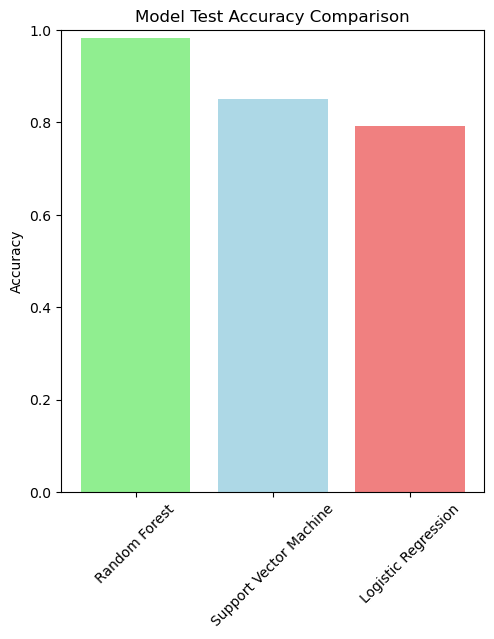

In [36]:
# Visual comparison
plt.figure(figsize=(12, 6))

# Test Accuracy comparison
plt.subplot(1, 2, 1)
models_sorted = performance_df['Model']
accuracies_sorted = performance_df['Test Accuracy']
bars = plt.bar(models_sorted, accuracies_sorted, color=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Model Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)


C:\Users\HP\AppData\Local\Temp\ipykernel_19416\613261392.py:18: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


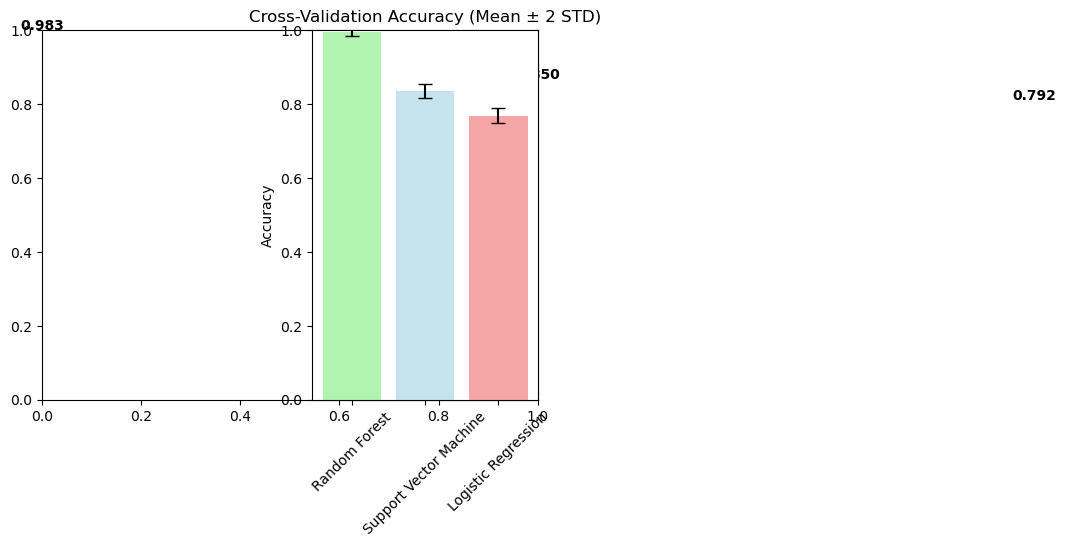

In [37]:
# Add value labels
for bar, accuracy in zip(bars, accuracies_sorted):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{accuracy:.3f}', ha='center', va='bottom', fontweight='bold')

# Cross-validation comparison
plt.subplot(1, 2, 2)
cv_means = performance_df['CV Mean Accuracy']
cv_stds = performance_df['CV Std']
x_pos = np.arange(len(models_sorted))

plt.bar(x_pos, cv_means, yerr=cv_stds, capsize=5, color=['lightgreen', 'lightblue', 'lightcoral'], alpha=0.7)
plt.title('Cross-Validation Accuracy (Mean ± 2 STD)')
plt.ylabel('Accuracy')
plt.xticks(x_pos, models_sorted, rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


🔄 Confusion Matrix:


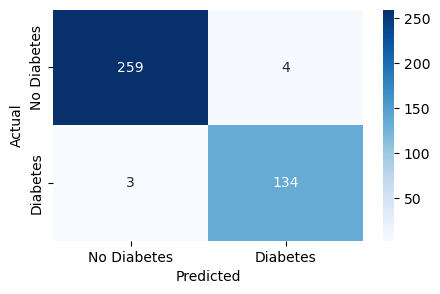

In [38]:
# Get the best model
best_model_name = performance_df.iloc[0]['Model']
best_result = results[best_model_name]

# Confusion Matrix
print("\n🔄 Confusion Matrix:")
cm = confusion_matrix(y_test, best_result['predictions'])
# Plot confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


🌳 Feature Importance (Random Forest):


C:\Users\HP\AppData\Local\Temp\ipykernel_19416\66509616.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')


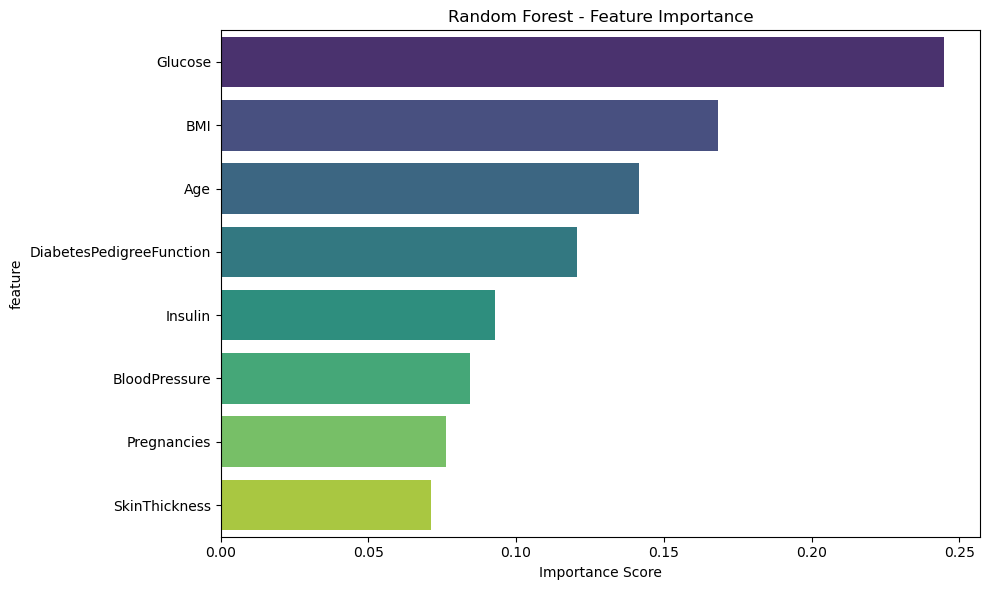

,feature,importance
0,Glucose,0.244793
1,BMI,0.168516
2,Age,0.141575
7,DiabetesPedigreeFunction,0.120651
5,Insulin,0.092704
6,BloodPressure,0.084484
3,Pregnancies,0.076206
4,SkinThickness,0.071071


In [39]:
# Feature Importance (if available)
if hasattr(best_result['model'], 'feature_importances_'):
    print("\n🌳 Feature Importance (Random Forest):")
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_result['model'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
    plt.title(f'{best_model_name} - Feature Importance')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()
    
    display(feature_importance)

# %% [markdown]

🔮 MAKING PREDICTIONS ON TEST DATA
Using best model: Random Forest

📊 PREDICTION RESULTS (First 15 patients):


,Actual,Predicted,Probability_No_Diabetes,Probability_Diabetes,Correct,Actual_Label,Predicted_Label
0,0,0,0.89,0.11,True,No Diabetes,No Diabetes
1,0,0,1.00,0.00,True,No Diabetes,No Diabetes
2,0,0,0.99,0.01,True,No Diabetes,No Diabetes
3,1,1,0.31,0.69,True,Diabetes,Diabetes
4,0,0,1.00,0.00,True,No Diabetes,No Diabetes
5,1,1,0.04,0.96,True,Diabetes,Diabetes
6,0,0,0.99,0.01,True,No Diabetes,No Diabetes
7,0,0,1.00,0.00,True,No Diabetes,No Diabetes
8,1,1,0.04,0.96,True,Diabetes,Diabetes
9,1,1,0.03,0.97,True,Diabetes,Diabetes


📈 PREDICTION ANALYSIS
✅ Accuracy: 0.983 (98.2%)
✅ Correct predictions: 393/400
❌ Wrong predictions: 7/400

🔍 Prediction Examples:
Correct predictions:
  ✅ Patient: Actual=No Diabetes, Predicted=No Diabetes
  ✅ Patient: Actual=No Diabetes, Predicted=No Diabetes
  ✅ Patient: Actual=No Diabetes, Predicted=No Diabetes

Wrong predictions:
  ❌ Patient: Actual=Diabetes, Predicted=No Diabetes
  ❌ Patient: Actual=Diabetes, Predicted=No Diabetes
  ❌ Patient: Actual=No Diabetes, Predicted=Diabetes

🔄 Confusion Matrix:
[[259   4]
 [  3 134]]


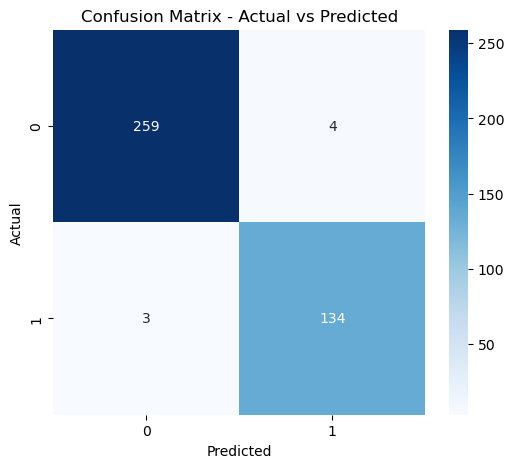

In [40]:
# %% [markdown]
# ## 7. Predictions on Test Data

# %%
print("🔮 MAKING PREDICTIONS ON TEST DATA")
print("=" * 40)

# Get the best model
best_model_name = performance_df.iloc[0]['Model']
best_model = results[best_model_name]['model']

print(f"Using best model: {best_model_name}")

# Make predictions on test data
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

# Create results table
results_comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Probability_No_Diabetes': y_pred_proba[:, 0],
    'Probability_Diabetes': y_pred_proba[:, 1],
    'Correct': y_test.values == y_pred
})

# Add labels for better readability
results_comparison['Actual_Label'] = results_comparison['Actual'].map({0: 'No Diabetes', 1: 'Diabetes'})
results_comparison['Predicted_Label'] = results_comparison['Predicted'].map({0: 'No Diabetes', 1: 'Diabetes'})

print("\n📊 PREDICTION RESULTS (First 15 patients):")
print("=" * 50)
display(results_comparison.head(15))

# %% [markdown]
# ## 8. Prediction Analysis

# %%
print("📈 PREDICTION ANALYSIS")
print("=" * 30)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

# Show correct vs incorrect counts
correct = results_comparison['Correct'].sum()
total = len(results_comparison)
print(f"✅ Correct predictions: {correct}/{total}")
print(f"❌ Wrong predictions: {total-correct}/{total}")

# Show examples
print("\n🔍 Prediction Examples:")
correct_predictions = results_comparison[results_comparison['Correct'] == True].head(3)
print("Correct predictions:")
for idx, row in correct_predictions.iterrows():
    print(f"  ✅ Patient: Actual={row['Actual_Label']}, Predicted={row['Predicted_Label']}")

wrong_predictions = results_comparison[results_comparison['Correct'] == False].head(3)
print("\nWrong predictions:")
if len(wrong_predictions) > 0:
    for idx, row in wrong_predictions.iterrows():
        print(f"  ❌ Patient: Actual={row['Actual_Label']}, Predicted={row['Predicted_Label']}")
else:
    print("  🎉 No wrong predictions!")

# Confusion Matrix
print("\n🔄 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Actual vs Predicted')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19416\4130611932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette=['orange', 'grey'])


Text(0.5, 0, 'Outcome (0: No Diabetes, 1: Diabetes)')

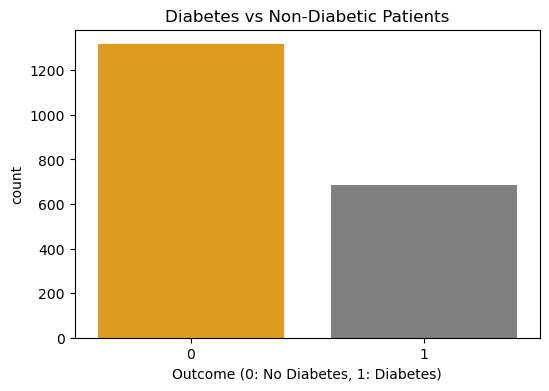

In [41]:
# Diabetes outcome distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, palette=['orange', 'grey'])
plt.title('Diabetes vs Non-Diabetic Patients')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')


Text(0.5, 1.0, 'Feature Correlation with Diabetes Outcome')

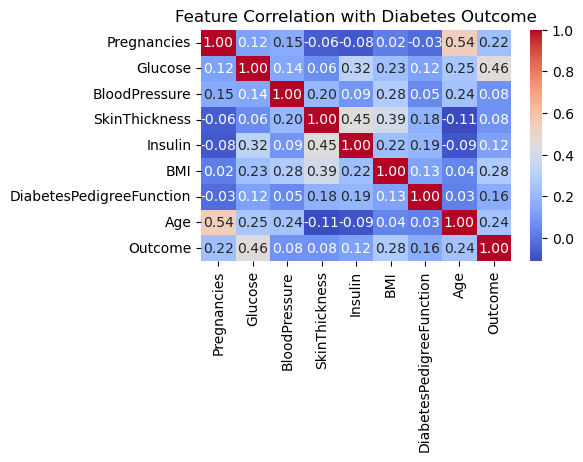

In [42]:
# Correlation heatmap
plt.figure(figsize=(5, 3))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation with Diabetes Outcome')

C:\Users\HP\AppData\Local\Temp\ipykernel_19416\1845570608.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=df, palette=['lightgreen', 'pink'])


Text(0, 0.5, 'Glucose Level')

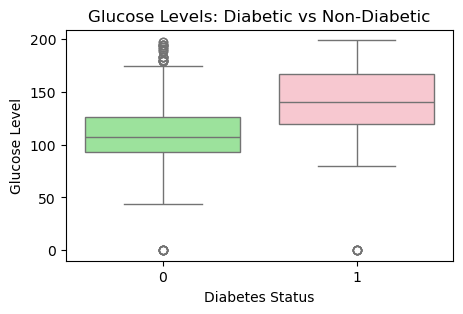

In [43]:
# Glucose distribution by diabetes outcome
plt.figure(figsize=(5, 3))

sns.boxplot(x='Outcome', y='Glucose', data=df, palette=['lightgreen', 'pink'])
plt.title('Glucose Levels: Diabetic vs Non-Diabetic')
plt.xlabel('Diabetes Status')
plt.ylabel('Glucose Level')

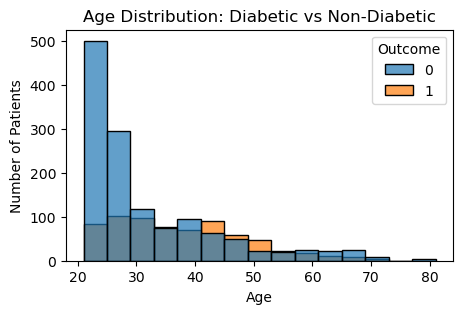

In [44]:
# Age distribution by diabetes outcome
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='Age', hue='Outcome', bins=15, alpha=0.7)
plt.title('Age Distribution: Diabetic vs Non-Diabetic')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19416\2814486838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=df, palette=['lightgreen', 'red'])


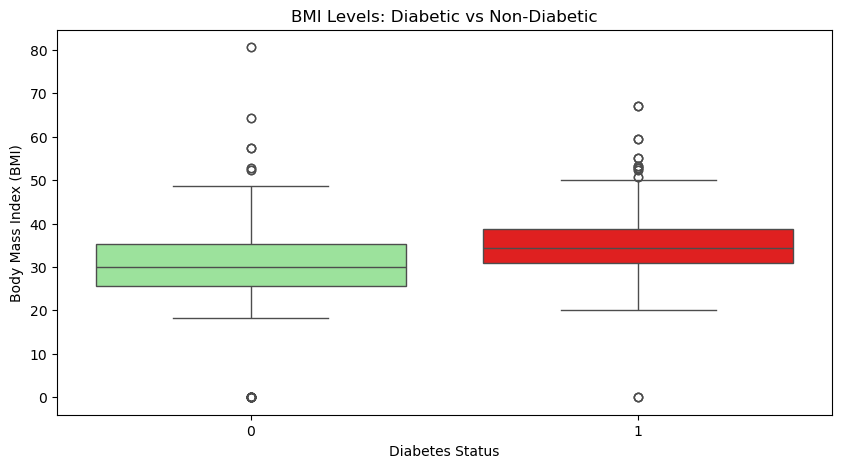

In [45]:
# BMI distribution by diabetes outcome
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outcome', y='BMI', data=df, palette=['lightgreen', 'red'])
plt.title('BMI Levels: Diabetic vs Non-Diabetic')
plt.xlabel('Diabetes Status')
plt.ylabel('Body Mass Index (BMI)')
plt.show()

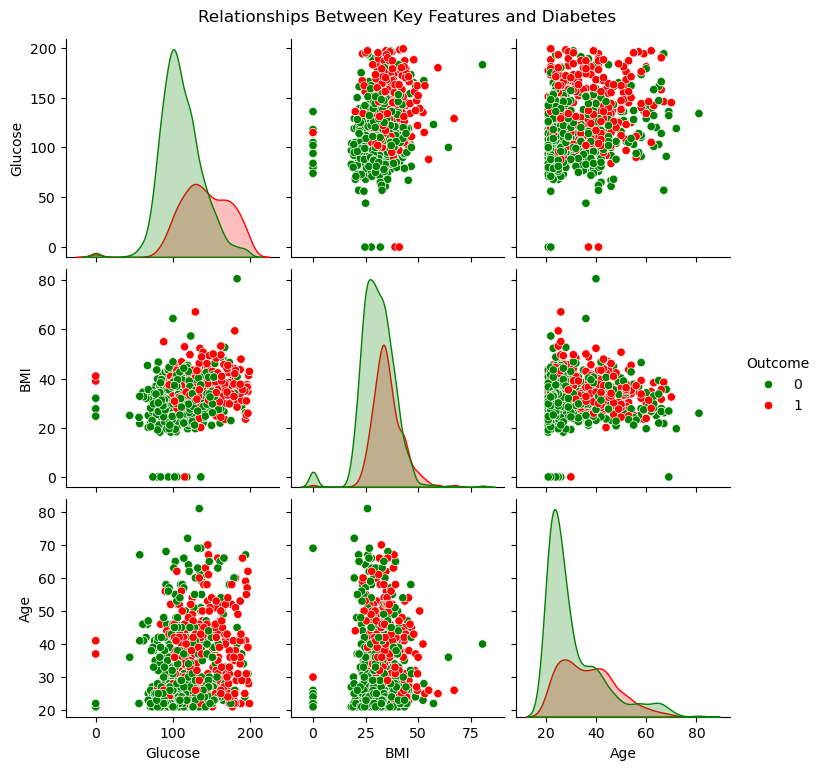

In [46]:
# Pair plot for top 4 features
top_features = ['Glucose', 'BMI', 'Age', 'Outcome']
sns.pairplot(df[top_features], hue='Outcome', palette=['green', 'red'], diag_kind='kde')
plt.suptitle('Relationships Between Key Features and Diabetes', y=1.02)
plt.show()

In [47]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
# Handle impossible zero values in medical features
medical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for feature in medical_features:
    median_val = df[df[feature] != 0][feature].median()
    df[feature] = df[feature].replace(0, median_val)
    print(f"Replaced zeros in {feature} with median: {median_val:.2f}")

Replaced zeros in Glucose with median: 117.00
Replaced zeros in BloodPressure with median: 72.00
Replaced zeros in SkinThickness with median: 29.00
Replaced zeros in Insulin with median: 126.00
Replaced zeros in BMI with median: 32.40


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Feature Scaling (only on training data, then transform test data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training
X_test_scaled = scaler.transform(X_test)        # Only transform on test

In [50]:
# 3. Feature Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)        

In [51]:
# Feature Engineering - Create new meaningful features
df_engineered = df.copy()

# 1. Create BMI Categories (clinically relevant)
df_engineered['BMI_Category'] = pd.cut(df_engineered['BMI'], 
                                      bins=[0, 18.5, 25, 30, 100],
                                      labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# 2. Create Age Groups
df_engineered['Age_Group'] = pd.cut(df_engineered['Age'],
                                   bins=[0, 30, 45, 60, 100],
                                   labels=['Young', 'Middle', 'Senior', 'Elderly'])

# 3. Create Glucose Risk Levels
df_engineered['Glucose_Risk'] = pd.cut(df_engineered['Glucose'],
                                      bins=[0, 100, 126, 300],
                                      labels=['Normal', 'Prediabetic', 'Diabetic'])

print("New features created:")
print("BMI Categories:", df_engineered['BMI_Category'].value_counts().to_dict())
print("Age Groups:", df_engineered['Age_Group'].value_counts().to_dict())

New features created:
BMI Categories: {'Obese': 1244, 'Overweight': 478, 'Normal': 268, 'Underweight': 10}
Age Groups: {'Young': 1106, 'Middle': 598, 'Senior': 217, 'Elderly': 79}


In [52]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,                    # Features
    y,                    # Target variable
    test_size=0.2,        # 20% for testing, 80% for training
    random_state=42,      # For reproducible results
)
print(X_train.shape)
print(X_test.shape)

(1600, 8)
(400, 8)


In [61]:
# Initialize multiple models
from sklearn.metrics import r2_score
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# Train and compare all models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_score1 = r2_score(y_test, y_pred)
    results[name] = r2_score1
    print(f"✅ {name}: {r2_score1:.3f}")

# Select best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n🏆 Best Model: {best_model_name} with {results[best_model_name]:.3f} r2_score")

✅ Random Forest: 0.957
✅ Logistic Regression: 0.021
✅ Support Vector Machine: -0.000

🏆 Best Model: Random Forest with 0.957 r2_score


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Actual vs Predicted')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()